#### Verificando a quantidade de Pontes no Grafo do Brasil

In [3]:
#Bibliotecas
import numpy as np
import pandas as pd
import networkx as nx
import pylab as plt
from networkx.drawing.nx_agraph import graphviz_layout

Nro. Mínimo de Cores: 4
Nro. de Pontes: [('PR', 'SC'), ('SC', 'RS'), ('GO', 'DF'), ('PA', 'AP')]


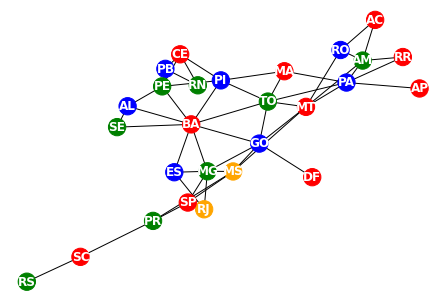

In [43]:
# Networkx possui funções greedy_color que implementa o preenchimento de cor dos vértices do 
# grafo utiliznado uma lógica Gulosa previamente escolhida ou passando uma função criada.

# Cria a função para colorir os vertices conforme descrito nos Tutoriais da Networkx
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.coloring.greedy_color.html#networkx.algorithms.coloring.greedy_color
def pintavertices(G):
    # Definicao de variaveis
    colorpalette = {0:'red', 1:"green", 2:"blue", 3:"orange", 4:"pink", 5:"yellow"}
    mapadecor = []

    # Chama a função greedy_color passando a Estratégia "largest_First" que segundo a documentação implementa
    # um preenchimento de cor gulosa, baseado no grau de cada vértice em ordem descrescente de grau
    g_color = nx.coloring.greedy_color(G, strategy="largest_first")
    
    #Exibe o Nro. Cromático para aferição
    chromaticnumber = max(g_color.values())+1
    print("Nro. Mínimo de Cores:", chromaticnumber)
    
    # Preenchimento das cortes de cada vértice, precisamos criar um laço para facilitar o preenchimento
    for node in G:
        mapadecor.append(colorpalette[g_color[node]])
    return mapadecor

# Criação do Grafo
G = nx.Graph()

# Criação de todos os vértices.
V = ["CE", "RN", "PB", "PE","AL", "SE", "BA", "PI", "MA", "ES", "RJ", "MG", "SP","PR", "SC", "RS", "TO", "GO", "DF", "MS",
     "MT", "PA", "AP", "RR","AM", "AC", "RO"]
# Criação de toas as arestas, com apoio de outros colegas que já haviam desenhando os vértices.
E = [("CE", "PI"), ("CE","RN"), ("CE", "PB"), ("CE", "PE"), ("RN", "PB"), ("PB", "PE"), ("PE", "AL"), ("PE","PI"), ("AL", "SE"),
     ("SE", "BA"), ("BA", "ES"), ("BA","MG"), ("BA", "GO"), ("BA", "TO"), ("BA", "PI"), ("ES", "RJ"), ("ES", "MG"), ("RJ","MG"),
     ("RJ", "SP"), ("MG", "SP"), ("MG", "GO"), ("MG", "MS"), ("SP", "PR"), ("SP","MS"), ("PR", "SC"), ("PR", "MS"), ("SC", "RS"),
     ("MS", "GO"), ("MS", "MT"), ("GO", "MT"), ("GO", "DF"), ("GO", "TO"), ("MT","RO"), ("MT", "TO"), ("MT", "PA"), ("MT", "AM"),
     ("TO", "MA"), ("TO", "PI"), ("TO", "PA"), ("MA", "PI"), ("MA", "PA"), ("PA","AP"), ("PA", "RR"), ("PA", "AM"), ("AM", "RR"),
     ("AM", "AC"), ("AM", "RO"), ("AC", "RO"), ("PE","BA"), ("BA","AL")]
# Adicionando os vérticees ao grafo.
G.add_nodes_from(V)
# Adicionando as Arestas ao Grafo
G.add_edges_from(E)

# Mostra o grafo colorido
mapadecor=pintavertices(G)
nx.draw(G, pos=nx.spring_layout(G), with_labels=True, font_weight='bold', font_color="w", node_color=mapadecor)

# Mostra quais pontes no Grafo do Brasil
print("Nro. de Pontes:", list(nx.bridges(G)))


#### Carteiro Chines - Caminho de Euler

Nro. Mínimo de Cores: 4
Caminho Euleriano: [('CE', 'PB'), ('PB', 'PE'), ('PE', 'BA'), ('BA', 'PI'), ('PI', 'MA'), ('MA', 'PA'), ('PA', 'AM'), ('AM', 'RO'), ('RO', 'AC'), ('AC', 'AM'), ('AM', 'RR'), ('RR', 'PA'), ('PA', 'AP'), ('AP', 'PA'), ('PA', 'MT'), ('MT', 'AM'), ('AM', 'RO'), ('RO', 'MT'), ('MT', 'MS'), ('MS', 'MT'), ('MT', 'PA'), ('PA', 'TO'), ('TO', 'MT'), ('MT', 'GO'), ('GO', 'DF'), ('DF', 'GO'), ('GO', 'MS'), ('MS', 'PR'), ('PR', 'MS'), ('MS', 'PR'), ('PR', 'SC'), ('SC', 'RS'), ('RS', 'SC'), ('SC', 'PR'), ('PR', 'SP'), ('SP', 'MS'), ('MS', 'MG'), ('MG', 'SP'), ('SP', 'RJ'), ('RJ', 'MG'), ('MG', 'GO'), ('GO', 'TO'), ('TO', 'MA'), ('MA', 'PI'), ('PI', 'TO'), ('TO', 'BA'), ('BA', 'GO'), ('GO', 'BA'), ('BA', 'MG'), ('MG', 'ES'), ('ES', 'RJ'), ('RJ', 'ES'), ('ES', 'BA'), ('BA', 'AL'), ('AL', 'BA'), ('BA', 'SE'), ('SE', 'AL'), ('AL', 'PE'), ('PE', 'PB'), ('PB', 'RN'), ('RN', 'CE'), ('CE', 'PE'), ('PE', 'PI'), ('PI', 'CE')]


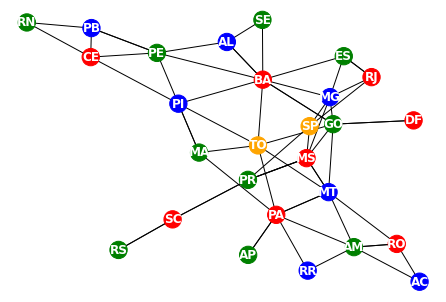

In [45]:
#Transformando em o Grafo do Brasil em um circuito Euleriano
H = nx.eulerize(G)

# Mostra o grafo colorido
mapadecor=pintavertices(H)
nx.draw(H, pos=nx.spring_layout(H), with_labels=True, font_weight='bold', font_color="w", node_color=mapadecor)

# Mostra quais pontes no Grafo do Brasil
print("Caminho Euleriano:", list(nx.eulerian_circuit(H)))